### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.


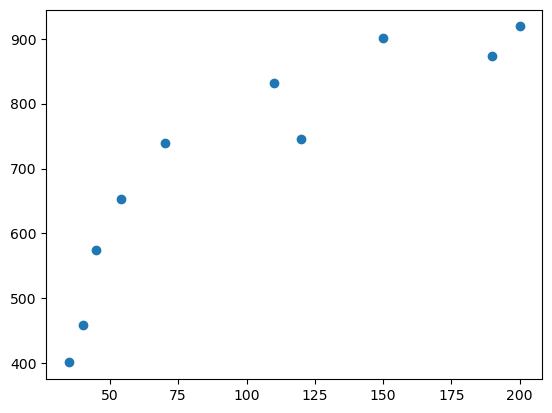

In [39]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp, ks)
plt.show()


In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
zp1 = zp.reshape(-1,1)
# print(zp1)
model.fit(zp1,ks)
model.intercept_, model.coef_


(444.1773573243596, array([2.62053888]))

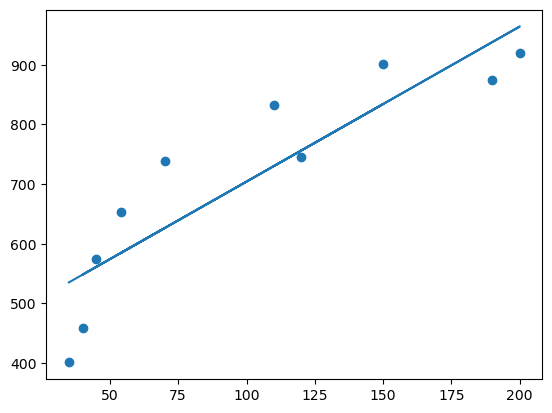

In [56]:
plt.scatter(zp, ks)
plt.plot(zp, 444.2+2.6*zp)
plt.show()

Найдем R^2

In [25]:
model.score(zp1, ks)

0.7876386635293686

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).


In [36]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
def mse_(B1, ks = ks, zp = zp, n =10):
    return np.sum((B1*zp - ks)**2)/n

In [87]:
B1 = 0.1
n = 10
# Выберем шаг сходимости alpha
alpha = 0.000001
m = 0
B0 = 1

# for i in range (3000):
while abs(B1-B0) > 0.0001:
    B0 = B1
    B1 = B0 - alpha * (2/n) * np.sum((B0*zp-ks)*zp)
    m = m + 1
print(f'B1 = {B1}')
print(B0)
print(f'количество шагов приближения {m}')

B1 = 5.886295772125325
5.886195905138796
количество шагов 265


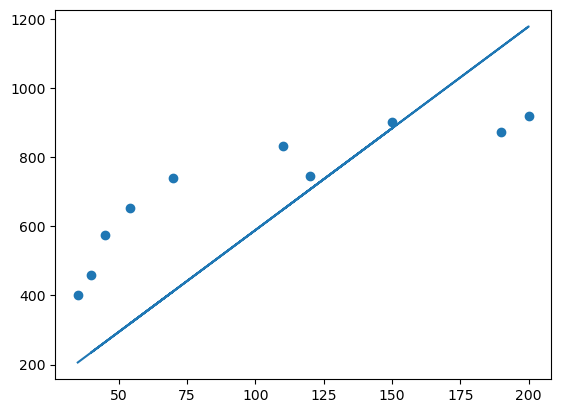

In [80]:
plt.scatter(zp, ks)
plt.plot(zp, B1 * zp)
plt.show()

Задача 3 (Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

In [121]:
b0 = 1
b1 = 1
# Выберем шаг сходимости alpha
alpha = 0.00005
temp_b0 = 0
temp_b1 = 0
m = 0

while abs(temp_b0 - b0) > 0.0000001 and abs(temp_b1 - b1) > 0.0000001:
  temp_b0 = b0
  temp_b1 = b1
  ks_pred = b0 + b1 * zp
  error = ks_pred - ks
  b0 -= alpha * (2 / len(zp)) * np.sum(error)
  b1 -= alpha * (2 / len(zp)) * np.sum(error * zp)
  m = m + 1
print(f'Коэфициенты линейной регрессии b0 = {b0} b1 = {b1}')
print(f'количество итераций {m}')
print(error)

Коэфициенты линейной регрессии b0 = 443.6417480596457 b1 = 2.624481203397519
количество итераций 264858
[ 134.49858009  -12.25660687   68.29318212   49.53799515   89.62098661
 -111.64457429  -67.63627514  -64.68607002   12.57949088  -99.66532215]
